In [1]:
from datasets import load_dataset
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt 
import json
import pathlib 

In [2]:
dataset = load_dataset("nlu_evaluation_data")['train']

Using custom data configuration default
Reusing dataset nlu_evaluation_data (/home/estengel/.cache/huggingface/datasets/nlu_evaluation_data/default/1.1.0/0416a5876d8240bd571f2bc2ad421cf6e6e88d938f8dcb5fd87b5af6033d6282)


551
379
Counter({9: 1451, 48: 1205, 27: 1088, 67: 1062, 53: 1052, 7: 1002, 25: 939, 45: 877, 26: 785, 15: 759, 17: 694, 22: 684, 13: 626, 28: 585, 18: 554, 50: 551, 20: 550, 59: 541, 8: 533, 52: 504, 21: 450, 11: 415, 63: 399, 49: 379, 51: 378, 39: 369, 40: 330, 56: 324, 19: 320, 2: 297, 38: 294, 43: 276, 55: 270, 57: 257, 33: 246, 46: 241, 65: 239, 47: 237, 31: 224, 16: 221, 62: 215, 42: 204, 0: 203, 66: 200, 61: 199, 30: 198, 60: 186, 64: 185, 29: 172, 54: 166, 4: 163, 6: 145, 35: 142, 32: 126, 1: 123, 24: 122, 58: 112, 36: 100, 12: 97, 14: 90, 44: 80, 3: 80, 37: 80, 34: 39, 23: 25, 41: 25, 5: 24, 10: 6})


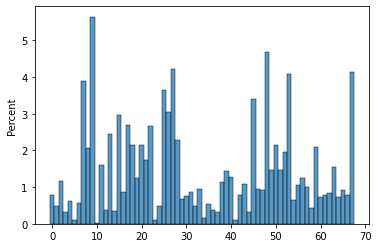

In [3]:
from collections import Counter

label_dist = [x['label'] for x in dataset]

sns.histplot(label_dist, stat="percent", discrete=True)


label_count = Counter(label_dist)
print(label_count[50])
print(label_count[49])
print(label_count)

In [20]:
big_xs = [5000, 10000, 20000, 50000, 100000, 120000]
big_ys = [50, 100, 200, 500]

total_small_data = 18000
total_big_data = 120000

small_xs_ys = []
small_ys = []

for bx in big_xs:
    for by in big_ys:
        perc_of_data = float(bx)/total_big_data
        ratio = float(by)/bx

        sx = int(perc_of_data * total_small_data) 
        sy = int(ratio * sx)
        small_xs_ys.append((sx, sy))


print(small_xs_ys)





[(750, 7), (750, 15), (750, 30), (750, 75), (1500, 7), (1500, 15), (1500, 30), (1500, 75), (3000, 7), (3000, 15), (3000, 30), (3000, 75), (7500, 7), (7500, 15), (7500, 30), (7500, 75), (15000, 7), (15000, 15), (15000, 30), (15000, 75), (18000, 7), (18000, 15), (18000, 30), (18000, 75)]


In [4]:
dataset = load_dataset("nlu_evaluation_data")['train']


for example in dataset:
    if example["label"] == 49:
        print(example)


Using custom data configuration default
Reusing dataset nlu_evaluation_data (/home/estengel/.cache/huggingface/datasets/nlu_evaluation_data/default/1.1.0/0416a5876d8240bd571f2bc2ad421cf6e6e88d938f8dcb5fd87b5af6033d6282)


{'text': 'go back', 'scenario': 'play', 'label': 49}
{'text': 'play me the latest podcast about online surveys', 'scenario': 'play', 'label': 49}
{'text': 'play me some podcasts about getting rich quick', 'scenario': 'play', 'label': 49}
{'text': 'play my newest podcasts from radiolab', 'scenario': 'play', 'label': 49}
{'text': 'play my favorite podcast', 'scenario': 'play', 'label': 49}
{'text': "search for podcasts that cover men's issues", 'scenario': 'play', 'label': 49}
{'text': 'play next recording', 'scenario': 'play', 'label': 49}
{'text': 'jump to next podcast', 'scenario': 'play', 'label': 49}
{'text': 'skip to next episode', 'scenario': 'play', 'label': 49}
{'text': 'next', 'scenario': 'play', 'label': 49}
{'text': 'next one', 'scenario': 'play', 'label': 49}
{'text': 'next one please', 'scenario': 'play', 'label': 49}
{'text': 'skip', 'scenario': 'play', 'label': 49}
{'text': 'play the next one', 'scenario': 'play', 'label': 49}
{'text': 'play a podcast from my library', 's

In [5]:
data_freqs_by_intent = {4: 163, 6: 145, 35: 142, 32: 126, 1: 123, 24: 122, 58: 112, 36: 100, 12: 97, 14: 90, 44: 80}


# 44, 58




Using custom data configuration default
Reusing dataset nlu_evaluation_data (/home/estengel/.cache/huggingface/datasets/nlu_evaluation_data/default/1.1.0/0416a5876d8240bd571f2bc2ad421cf6e6e88d938f8dcb5fd87b5af6033d6282)


{'text': 'loop this track', 'scenario': 'music', 'label': 44}
{'text': 'shuffle this playlist', 'scenario': 'music', 'label': 44}
{'text': 'enable shuffle', 'scenario': 'music', 'label': 44}
{'text': 'save settings', 'scenario': 'music', 'label': 44}
{'text': 'disable shuffle', 'scenario': 'music', 'label': 44}
{'text': 'repeat album', 'scenario': 'music', 'label': 44}
{'text': "please lower the shuffle rate of hips don't lie", 'scenario': 'music', 'label': 44}
{'text': 'please repeat that music again of akon', 'scenario': 'music', 'label': 44}
{'text': 'repeat same song for ten times', 'scenario': 'music', 'label': 44}
{'text': 'play only particular singer songs', 'scenario': 'music', 'label': 44}
{'text': 'put the playlist on shuffle', 'scenario': 'music', 'label': 44}
{'text': 'stop repeating this song', 'scenario': 'music', 'label': 44}
{'text': 'repeat this song', 'scenario': 'music', 'label': 44}
{'text': 'please go to settings of the music player and make the equalizer in the fl